Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html


In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
# datascience version number of last run of this notebook
version.__version__


'0.5.19'

In [2]:
import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

In [3]:
def simdata(n, f, eps, low, high):
    x_tbl = ML_Table().sequence('x', n, low, high)
    s_tbl = ML_Table().with_column('i', range(n))
    s_tbl['x'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n)                
    s_tbl['f'] = s_tbl.apply(f, 'x')
    s_tbl['Y'] = s_tbl['f'] + eps*(np.random.rand(n)-0.5)
    return s_tbl   

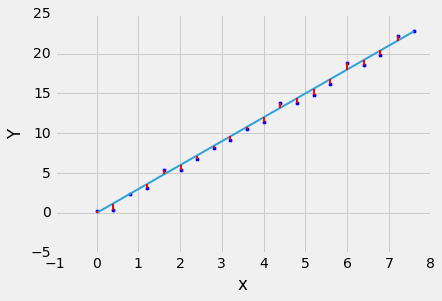

In [4]:
def polyf(x):
    return 2 + (x-0.5)**2 - 0.1*x**3
def linf(x):
    return 3*x
d = simdata(20, linf, 2, 0, 8)
d.plot_fit_1d('x', 'Y', linf)

(array([ 3.02460629]), -0.30687657232872922)


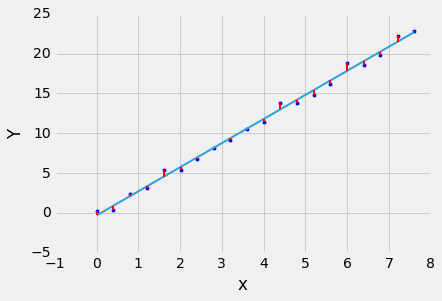

In [5]:
print(d.select(['x', 'Y']).regression_params('Y'))
dmodel = d.select(['x', 'Y']).regression('Y')
d.plot_fit_1d('x', 'Y', dmodel)

In [6]:
def simdata2D(n, f, eps, low, high):
    x_tbl = ML_Table().sequence('x', n, low, high)
    s_tbl = ML_Table().with_column('i', range(n))
    s_tbl['x'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n) 
    s_tbl['y'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n)    
    s_tbl['f'] = s_tbl.apply(f, ['x', 'y'])
    s_tbl['Z'] = s_tbl['f'] + eps*(np.random.rand(n)-0.5)
    return s_tbl   

In [7]:
def f2d(x,y):
    return 3*x+2*y+1.5

In [8]:
d2d = simdata2D(30, f2d, 0, 1, 8)

In [9]:
print(d2d.select(['x', 'y', 'Z']).regression_params('Z'))
d2model = d2d.select(['x', 'y', 'Z']).regression('Z')

(array([ 3.,  2.]), 1.5000000000000036)


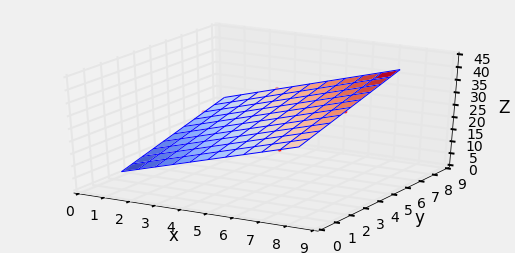

In [10]:
d2d.plot_fit_2d('x', 'y', 'Z', f2d, figsize=(8,4))

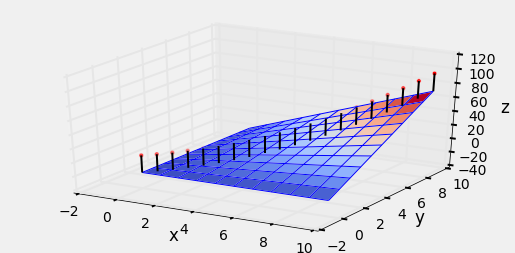

In [11]:
n = 20
tbl = ML_Table().sequence('x', n, 0, 10)
tbl['y'] = tbl['x']
tbl['z'] = tbl['x'] * tbl['y']+5
tbl.plot_fit_2d('x', 'y', 'z', lambda x,y:x*y-20, figsize=(8,4))

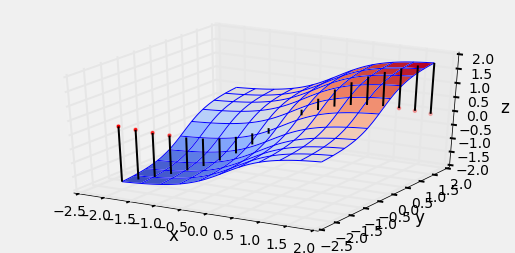

In [12]:
n = 20
def sigmoid(x):
    return x/((1+x**2)**0.5)

tbl = ML_Table().sequence('x', n, -2, 2)
tbl['y'] = tbl['x']
tbl['z'] = tbl.apply(sigmoid, 'x') + tbl.apply(sigmoid, 'y') - tbl['x']
tbl.plot_fit_2d('x', 'y', 'z', lambda x,y:sigmoid(x)+sigmoid(y), figsize=(8,4))

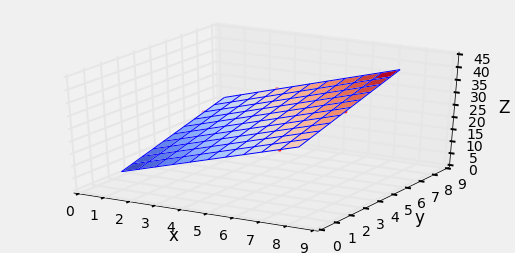

In [13]:
d2d.plot_fit_2d('x', 'y', 'Z', d2model, figsize=(8,4))

(array([ 3.13129205,  1.87538962]), 1.4417765076342306)


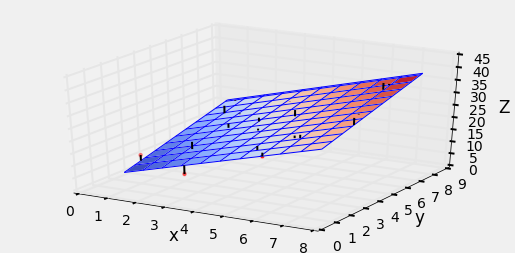

In [14]:
d2db = simdata2D(20, f2d, 8, 1, 8).select(['x', 'y', 'Z'])
print(d2db.regression_params('Z'))
ax = d2db.plot_fit_2d('x', 'y', 'Z', d2db.regression('Z'), figsize=(8,4))

In [23]:
d2db.ridge_params('Z')

(array([ 3.09033916,  1.8480944 ]), 1.73683409987283)

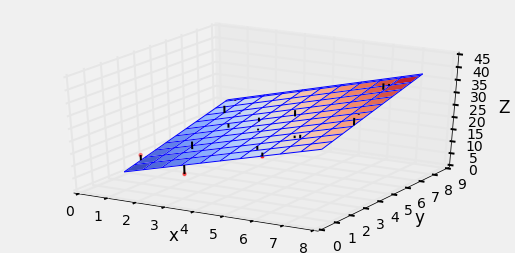

In [24]:
ax = d2db.plot_fit_2d('x', 'y', 'Z', d2db.ridge('Z'), figsize=(8,4))

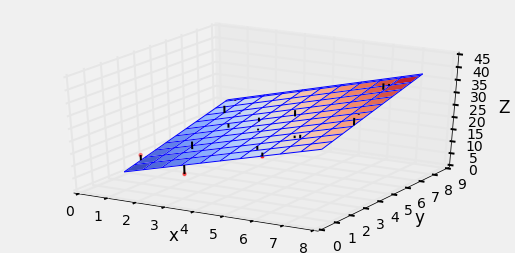

In [16]:
ax = d2db.plot_fit_2d('x', 'y', 'Z', d2db.ridge('Z'), figsize=(8,4))

In [17]:
def simdata3D(n, f, eps, low, high):
    x_tbl = ML_Table().sequence('x', n, low, high)
    s_tbl = ML_Table().with_column('i', range(n))
    s_tbl['x'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n) 
    s_tbl['y'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n)
    s_tbl['z'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n)   
    s_tbl['f'] = s_tbl.apply(f, ['x', 'y', 'z'])
    s_tbl['Z'] = s_tbl['f'] + eps*(np.random.rand(n)-0.5)
    return s_tbl   

In [18]:
def f3d(x,y, z):
    return 3*x + 2*y + z + 1.5

In [19]:
d3d = simdata3D(10, f3d, 0, 1, 8)
d3d

i,x,y,z,f,Z
0,4.50886,3.79649,6.58412,29.2037,29.2037
1,3.11984,5.90079,5.188,27.8491,27.8491
2,3.82351,0.995054,3.78891,18.7496,18.7496
3,5.91208,3.09245,3.12396,28.5451,28.5451
4,2.39394,7.3008,5.92472,29.2081,29.2081
5,7.28359,5.22354,1.69107,35.4889,35.4889
6,5.19648,1.70798,7.28494,27.7903,27.7903
7,6.59382,6.59409,0.97666,35.4463,35.4463
8,0.99651,2.40009,2.41626,11.706,11.706
9,1.69769,4.50211,4.48998,20.0873,20.0873


In [20]:
d3d = simdata3D(20, f3d, 0, 1, 10)
d3d.select(['x', 'y', 'z', 'Z']).regression_params('Z')

(array([ 3.,  2.,  1.]), 1.5)

In [21]:
d3d = simdata3D(20, f3d, 1, 1, 10)
d3d.select(['x', 'y', 'z', 'Z']).regression_params('Z')

(array([ 2.9717921 ,  2.01528577,  1.03859115]), 1.3641013505217572)

In [22]:
d3_model = d3d.select(['x', 'y', 'z', 'Z']).regression('Z')
d3d['model'] = d3d.apply(d3_model, ['x', 'y', 'z'])
(d3d['Z'] - d3d['model'])/d3d['Z']

array([ 0.00235829,  0.00798108, -0.00272793, -0.00281942, -0.00504482,
        0.0074043 ,  0.00520562, -0.0103855 ,  0.01613566,  0.0012473 ,
        0.00125882, -0.00965351, -0.00284452, -0.00049022,  0.01063261,
       -0.01072372, -0.01052235,  0.00020112,  0.01195759, -0.01272926])